## Preprocessing with Sklearn

Data preprocessing for supervised machine learning

**What you'll learn in this course 🧐🧐**

The example below implements all the necessary steps to train a machine learning model and make predictions on a dataset.

Use pandas and the preprocessing module of the scikit-learn library to prepare your data.
Use scikit-learn to train a supervised machine learning model and assess its performance.
We have a sample dataset of conversions available (has someone purchased a product). The objective is to predict whether a person has made a purchase, based on information about that person: nationality, age, and income level.

We will call "variable to predict", "variable to explain" or "target", noted Y, the column corresponding to "Purchased" in the dataset
The other columns of the dataset, called "explanatory variables" and denoted X, will be used to try to predict the value of Y

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

In [2]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("titanic.csv")
print("...Done.")
print()


# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
print(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
print(data_desc)
print()

print("Percentage of missing values: ")
print(100*dataset.isnull().sum()/dataset.shape[0])

Loading dataset...
...Done.

Number of rows : 891

Display of dataset: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000 

In [3]:
dataset.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Drop useless columns / columns with too many missing values
useless_cols = ['PassengerId','Name', 'Ticket', 'Cabin']

print("Dropping useless columns...")
dataset = dataset.drop(useless_cols, axis=1) # axis = 1 indicates that we are dropping along the column axis
# never hesitate to look at a function's documentation using the command name_of_the_function?
print("...Done.")
print(dataset.head())

Dropping useless columns...
...Done.
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [7]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
dataset.loc[(dataset["Embarked"] != "S")]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
5,0,3,male,NaN,0,0,8.4583,Q
9,1,2,female,14.0,1,0,30.0708,C
16,0,3,male,2.0,4,1,29.1250,Q
19,1,3,female,NaN,0,0,7.2250,C
...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C
879,1,1,female,56.0,0,1,83.1583,C
885,0,3,female,39.0,0,5,29.1250,Q
889,1,1,male,26.0,0,0,30.0000,C


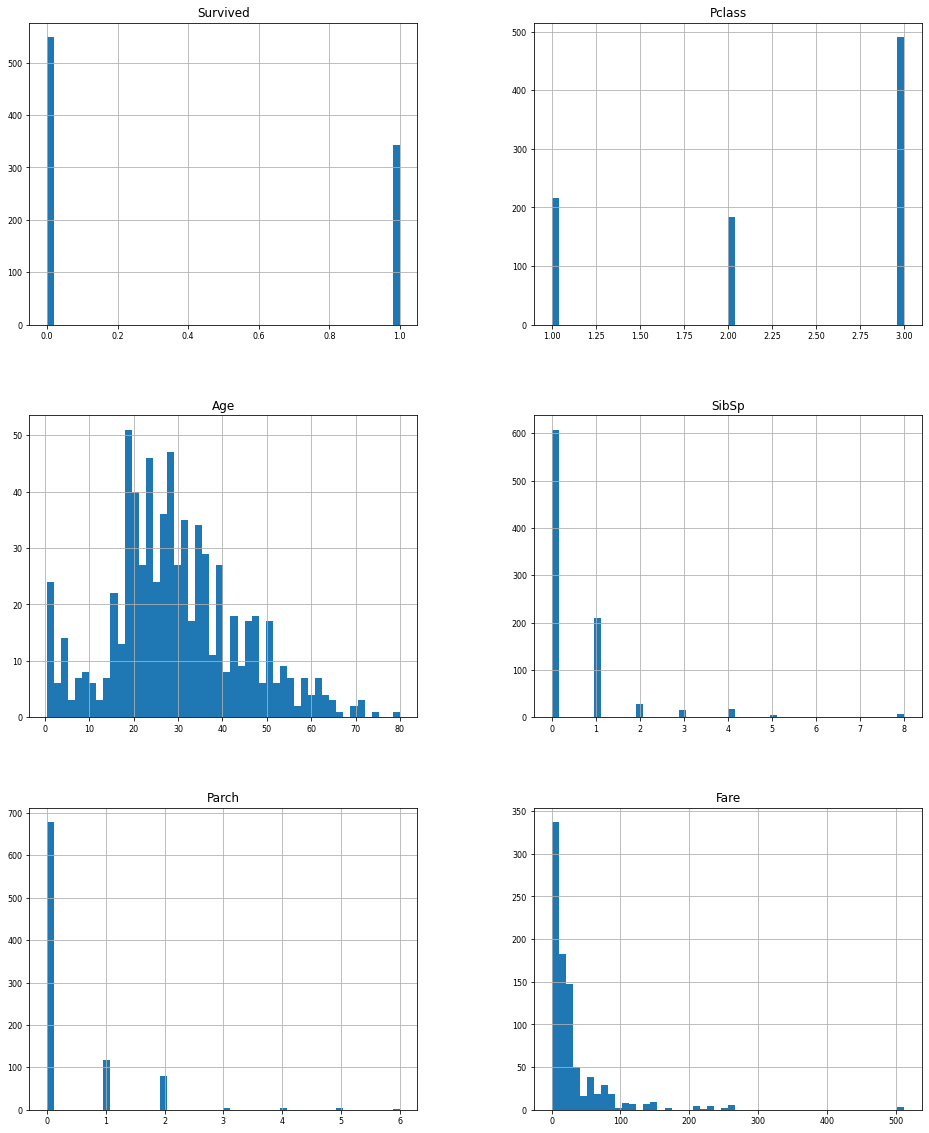

In [8]:
# listing dataframes types
list(set(dataset.dtypes.tolist()))
# include only float and integer
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
# display what has been selected
df_num.head()
# plot
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [9]:
# # Drop lines containing outliers (using masks)

# print('Dropping outliers in Age...')
# to_keep = (dataset['Age'] > 0) | (dataset['Age'].isnull()) # We want keeping positives values or missings
# dataset = dataset.loc[to_keep,:] 
# print('Done. Number of lines remaining : ', dataset.shape[0])
# print()

# print('Dropping outliers in Salary...')
# to_keep = dataset['Salary'] < dataset['Salary'].mean() + 2*dataset['Salary'].std()
# dataset = dataset.loc[to_keep,:]
# print('Done. Number of lines remaining : ', dataset.shape[0])
# print()

print('Dropping NAs in Embarked...')
dataset = dataset[dataset['Embarked'].notna()]
print('Done. Number of lines remaining : ', dataset.shape[0])
print()

# dataset.head()

Dropping NAs in Embarked...
Done. Number of lines remaining :  889



In [10]:
# Separate target variable Y from features X
target_name = 'Survived'

print("Separating labels from features...")
Y = dataset.loc[:,target_name]
X = dataset.loc[:,[c for c in dataset.columns if c!=target_name]] # All columns are kept, except the target
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S



In [11]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X = X.values
Y = Y.tolist()
print("...Done")
print(X[0:5,:])
print()
print(Y[0:5])

Convert pandas DataFrames to numpy arrays...
...Done
[[3 'male' 22.0 1 0 7.25 'S']
 [1 'female' 38.0 1 0 71.2833 'C']
 [3 'female' 26.0 0 0 7.925 'S']
 [1 'female' 35.0 1 0 53.1 'S']
 [3 'male' 35.0 0 0 8.05 'S']]

[0, 1, 1, 1, 0]


In [12]:
# First : always divide dataset into train set & test set !!
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# test_size indicates the proportion of rows from X and Y that will go into the test dataset while 
# maintaining the correspondance between the rows from X and Y 

# random_state is an argument that can be found in all functions that have a pseudo-random behaviour
# if random_state is not stated the function will derive a different random result everytime the cell 
# runs, if random_state is given a value the results will be the same everytime the cell runs while
# each different value of radom_state will derive a specific result
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [13]:
X_train[0]

array([3, 'male', nan, 1, 0, 15.5, 'Q'], dtype=object)

In [14]:
# Create pipeline for numeric features
numeric_features = [0,2,3,4,5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])
# Create pipeline for categorical features
categorical_features = [1,6] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
[[3 'male' nan 1 0 15.5 'Q']
 [1 'female' nan 0 0 79.2 'C']
 [3 'male' 29.0 1 0 7.0458 'S']
 [2 'female' 41.0 0 1 19.5 'S']
 [3 'female' 22.0 0 0 7.775 'S']]
...Done.
[[ 0.819235   -0.08808285  0.43240987 -0.46340068 -0.3202921   1.
   1.          0.        ]
 [-1.59267425 -0.08808285 -0.4826003  -0.46340068  0.90857198  0.
   0.          0.        ]
 [ 0.819235   -0.01204149  0.43240987 -0.46340068 -0.48338571  1.
   0.          1.        ]
 [-0.38671963  0.90045492 -0.4826003   0.75688778 -0.24312638  0.
   0.          1.        ]
 [ 0.819235   -0.54433106 -0.4826003  -0.46340068 -0.4693184   0.
   0.          1.        ]]

Performing preprocessings on test set...
[[3 'female' 14.0 0 0 7.8542 'S']
 [3 'male' nan 8 2 69.55 'S']
 [1 'female' 36.0 1 2 120.0 'S']
 [1 'male' 36.0 1 0 78.85 'S']
 [3 'female' 63.0 0 0 9.5875 'S']]
...Done.
[[ 0.819235   -1.152662   -0.4826003  -0.46340068 -0.46779052  0.
   0.          1.        ]
 [ 0.819235   -0.0

In [15]:
# Encode target variable Y
labelencoder = LabelEncoder()

print("Encoding labels on train set...")
print(Y_train[0:5])
print()
Y_train = labelencoder.fit_transform(Y_train)
print("...Done.")
print(Y_train[0:5])
print()

print("Encoding labels on test set...")
print(Y_test[0:5])
print()
Y_test = labelencoder.transform(Y_test) # Don't fit again !!
print("...Done.")
print(Y_test[0:5])
print()

Encoding labels on train set...
[0, 1, 0, 1, 1]

...Done.
[0 1 0 1 1]

Encoding labels on test set...
[0, 0, 1, 0, 1]

...Done.
[0 0 1 0 1]



In [16]:
# Train model
model = LogisticRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Training model...
...Done.


In [17]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

Predictions on training set...
...Done.
[0 1 0 1 1]



In [18]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[1 0 1 0 0]



In [19]:
# Print scores
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.8284106891701828
Accuracy on test set :  0.7134831460674157


In [25]:
# Print RMSE score
rms_score = sqrt(mean_squared_error(Y_test, Y_test_pred))
print("RMSE:", rms_score)


RMSE: 0.5352726911888783


In [27]:

# Print MAE score
mae_score = mean_absolute_error(Y_test, Y_test_pred)
print("MAE:", mae_score)


MAE: 0.28651685393258425


In [41]:
from sklearn.metrics import plot_confusion_matrix

/home/utilisateur/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


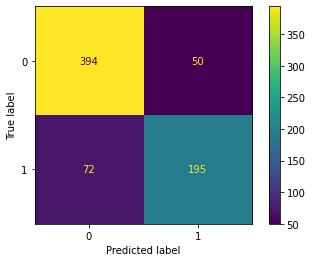

In [43]:
plot_confusion_matrix(model, X_train, Y_train)

In [40]:
confusion_matrix(Y_test, Y_test_pred)

array([[84, 21],
       [30, 43]])

In [28]:

print("coefficients are: ", model.coef_) 
print("Constant is: ", model.intercept_)


coefficients are:  [[-0.9557094  -0.66861782 -0.36822925 -0.05845908  0.11762829 -2.82072904
   0.34906187 -0.54259821]]
Constant is:  [1.4807113]


In [30]:

# Access transformers from feature_encoder
print("All transformers are: ", preprocessor.transformers_)


All transformers are:  [('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())]), [0, 2, 3, 4, 5]), ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first'))]), [1, 6])]


In [ ]:

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":preprocessor.coef_
})


In [ ]:

# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()


In [ ]:

# Visualize ranked features using seaborn
sns.set_style("darkgrid")
sns.color_palette("Set2")
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph
# %%